In [1]:
#here collection if different polotting approaches

#hovering dots:

import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)

%matplotlib qt

x = np.random.rand(15)
y = np.random.rand(15)
names = np.array(list("ABCDEFGHIJKLMNO"))
c = np.random.randint(1,5,size=15)

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c, s=100, cmap=cmap, norm=norm)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
#xytext - how far from the dot the text is, bbox - box with name inside, arrowprops - to draw arrow

annot.set_visible(False)

def update_annot(ind, name):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos #resets the xy values from annot above
    text = name
    annot.set_text(text) #resets the text from annot above
    
    #annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    #annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind, name="halloo")
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

qt.qpa.drawing: Layer-backing can not be explicitly controlled on 10.14 when built against the 10.14 SDK


In [3]:
# Save interactive plots:
#%matplotlib qt

tit='mags'
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot([1,2,3],[10,-10,30])
#Save:
import pickle
f_handle=open('picture_'+tit+'.fig.pickle', 'wb')
pickle.dump(fig, f_handle) # This is for Python 3 - py2 may need `file` instead of `open`
f_handle.close()
plt.close('all')


In [5]:

#Reopen:
%matplotlib qt
figx = pickle.load(open('picture_'+tit+'.fig.pickle', 'rb'))
figx.show() # Show the figure, edit it, etc.!

qt.qpa.drawing: Layer-backing can not be explicitly controlled on 10.14 when built against the 10.14 SDK


In [ ]:
#STATIC BOXPLOT (REMOVED FROM FUNKS COS UGLY)

def boxplot_std_static(std_data, tit='Magnetometers', channel_names=mags):

    # Make std BOXPLOT for entire data - all channels.
    # Looks horrrible

    import seaborn as sns
    from matplotlib import pyplot as plt
    import pandas as pd

    %matplotlib qt

    ch_only_name_mag=[m[0] for m in channel_names] #names of channels for annotating the plot
    #std_mags_df = pd.DataFrame(std_mags, index = ch_only_name_mag) #put all stds into a data frame with channels name as index

    #Boxplot with seaborn:
    fig, ax = plt.subplots()
    bp=sns.boxplot(data=std_data)
    sw=sns.swarmplot(data=std_data, color=".25", ax=ax) 
    plt.xlabel("Standard deviation")

    #Find what x values did boxplot assign to the y values of std data:
    #my_offsets = ax.collections[0].get_offsets()

    my_round =11 # rounding needed to deal with imperfect precision
    my_dict = {y.round(my_round):x for x,y in ax.collections[0].get_offsets()} # turn array into dict

    #Now annotate the dots (use std data as y and found assigned values as x for annotation):
    for i, txt in enumerate(ch_only_name_mag):
        std_val=str(std_mags[i])
        this_label = txt+': '+std_val
        this_y = std_mags[i]
        this_x = my_dict[this_y.round(my_round)] # use y-position to get seaborn-generated x-position
        annot = ax.annotate(xy=(this_x,this_y),text=this_label,xytext=(100,100), textcoords= "offset points",
                        bbox=dict(boxstyle="round", fc="w"),
                        arrowprops=dict(arrowstyle="->")) # add label
        sns.despine()

    ax.set_title(tit)
    plt.show()



In [ ]:
boxplot_std_static(std_data=std_mags, tit='Magnetometers', channel_names=mags)

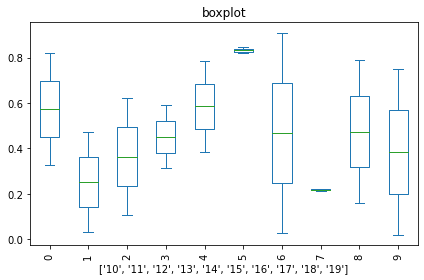

In [32]:
# put multiple boxplots in 1 plot:
# https://www.tutorialspoint.com/plot-multiple-boxplots-in-one-graph-in-pandas-or-matplotlib

%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Set the figure size
#plt.rcParams["figure.figsize"] = [7.50, 3.50]
#plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data = pd.DataFrame({"Box1": np.random.rand(10), "Box2": np.random.rand(10)})
data_transposed = data.T 

# Plot the dataframe
#ax = data[['Box1', 'Box2']].plot(kind='box', title='boxplot')

nam=[]
for n in list(range(10, 20)):
    nam.append(str(n))

ax = data_transposed.plot(kind='box', rot=90, title='boxplot')
plt.xlabel(nam)

# Display the plot
plt.show()

In [30]:
data

data_transposed

nam=[]

for n in list(range(10, 20)):
    nam.append(str(n))

nam


['10', '11', '12', '13', '14', '15', '16', '17', '18', '19']